In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from rdkit import Chem
from rdkit.Chem import Descriptors
from tqdm.auto import tqdm
import warnings
import polaris as po

tqdm.pandas()

c:\Users\Jash4\AppData\Local\anaconda3\envs\chemprop_py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset_name = "polaris/adme-fang-1"
ds = po.load_dataset(dataset_name)
df = ds[:]

Convert solubility from ug/mL to uM

C:\Users\Jash4\AppData\Local\Temp\1\ipykernel_8580\732335456.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


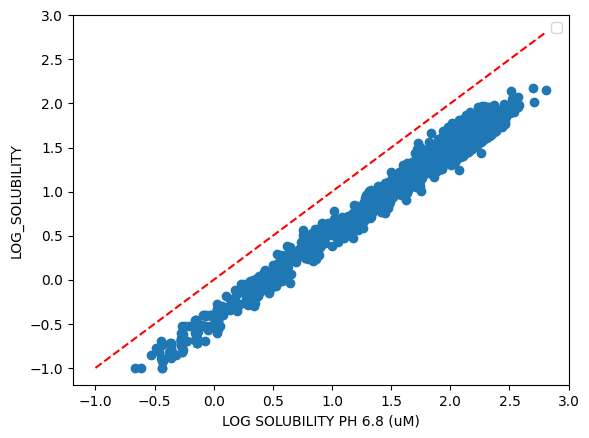

In [4]:
def compute_mol_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Descriptors.MolWt(mol)
df['Molecular Weight'] = df['smiles'].apply(compute_mol_weight)
df['LOG SOLUBILITY PH 6.8 (uM)'] = ((10**df['LOG_SOLUBILITY']) * 1000) / df['Molecular Weight']
df['LOG SOLUBILITY PH 6.8 (uM)'] = np.log10(df['LOG SOLUBILITY PH 6.8 (uM)'])


plt.scatter(df[ "LOG SOLUBILITY PH 6.8 (uM)"], df["LOG_SOLUBILITY"])
min_val = min(df[ "LOG SOLUBILITY PH 6.8 (uM)"].min(), df["LOG_SOLUBILITY"].min())
max_val = max(df[ "LOG SOLUBILITY PH 6.8 (uM)"].max(), df["LOG_SOLUBILITY"].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel( "LOG SOLUBILITY PH 6.8 (uM)")
plt.ylabel("LOG_SOLUBILITY")
plt.legend()
plt.show()

Make sure that all smiles strings can be parsed.

In [5]:
df = df.drop(['LOG_SOLUBILITY', 'Molecular Weight', "ORIGINAL_SMILES"],axis=1)
df['mol'] = df.smiles.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/3516 [00:00<?, ?it/s]

100%|██████████| 3516/3516 [00:03<00:00, 897.36it/s] 


In [6]:
rename_ls = ['UNIQUE_ID',
 'smiles',
 'HLM_CLint',
 'RLM_CLint',
 'ER',
 'HPPB',
 'RPPB',
 'Sol']
rename_dic = dict(zip(df.columns.tolist(), rename_ls))
rename_dic

{'UNIQUE_ID': 'UNIQUE_ID',
 'smiles': 'smiles',
 'LOG_HLM_CLint': 'HLM_CLint',
 'LOG_RLM_CLint': 'RLM_CLint',
 'LOG_MDR1-MDCK_ER': 'ER',
 'LOG_HPPB': 'HPPB',
 'LOG_RPPB': 'RPPB',
 'LOG SOLUBILITY PH 6.8 (uM)': 'Sol'}

array([[<Axes: title={'center': 'HLM_CLint'}>,
        <Axes: title={'center': 'RLM_CLint'}>],
       [<Axes: title={'center': 'ER'}>, <Axes: title={'center': 'HPPB'}>],
       [<Axes: title={'center': 'RPPB'}>,
        <Axes: title={'center': 'Sol'}>]], dtype=object)

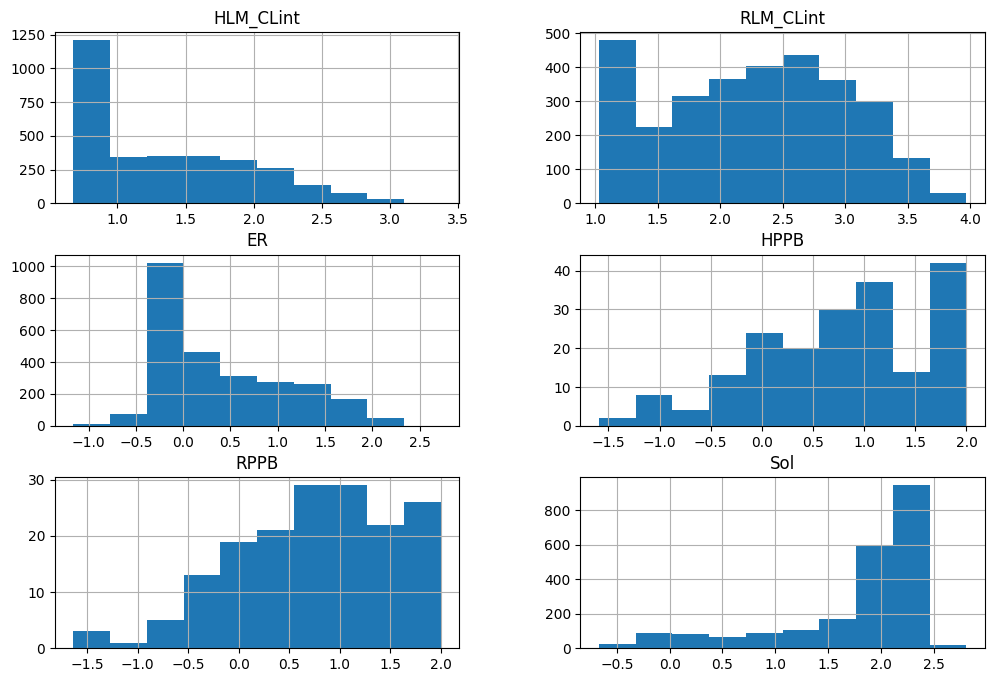

In [7]:
df = df.rename(columns=rename_dic)
df.hist(figsize = (12, 8))

In [8]:
df.dropna(inplace=True, subset=['Sol'])
df.reset_index(drop=True, inplace=True)
df.sort_values(by='Sol', inplace=True)

df.to_csv('sol_processed.csv', index=False)